<a href="https://colab.research.google.com/github/chaitu1904/Sentiment-Analysis/blob/main/Copy_of_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
saurabhshahane_twitter_sentiment_dataset_path = kagglehub.dataset_download('saurabhshahane/twitter-sentiment-dataset')

print('Data source import complete.')


100%|██████████| 7.60M/7.60M [00:00<00:00, 65.0MB/s]

Extracting files...


Data source import complete.


# DL Prac

> Name - Ishaan Gupta


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SimpleRNN
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.utils import to_categorical
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
data = pd.read_csv('/content/Twitter_Data.csv')
data.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


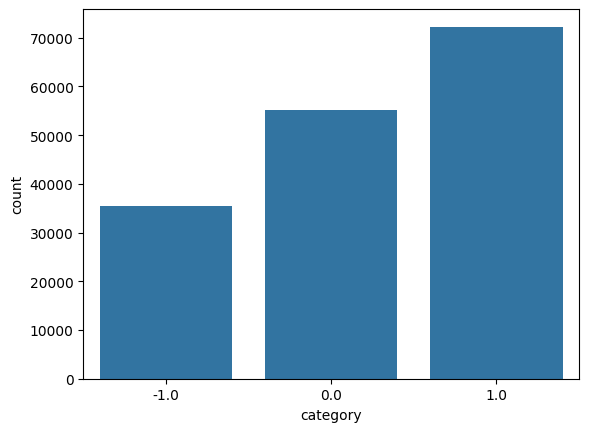

In [6]:
sns.countplot(x='category', data=data)
plt.show()

In [8]:
data.dropna(how='any', inplace=True)
data.isnull().sum()

,0
clean_text,0
category,0


In [7]:
texts = data['clean_text'].tolist()
labels = data['category'].tolist()

### Text preprocessing - stopwords removal and porter stemming algorithm

In [9]:
# Text preprocessing
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    text = text.lower()
    tokens = text.split()

    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]

    return ' '.join(tokens)

In [12]:
# Ensure that only string elements are processed
preprocessed_texts = [preprocess_text(text) for text in texts if isinstance(text, str)]

### Tokenization and fixing the vocabulary size

In [13]:
# Tokenization and word embeddings
vocab_size = 10000
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(preprocessed_texts)
sequences = tokenizer.texts_to_sequences(preprocessed_texts)

### Padding the sequence

In [14]:
# Padding sequences
max_length = 80
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

### One hot encoding

In [15]:
# Prepare labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
num_classes = len(set(labels))
one_hot_labels = to_categorical(encoded_labels)

In [17]:
# Ensure that only string elements in 'clean_text' column are kept,
# and also ensure the corresponding 'category' labels are kept as well.
# Filter the DataFrame based on the type of the 'clean_text' column.
data_filtered = data[data['clean_text'].apply(lambda x: isinstance(x, str))].copy()

# Now create the lists for texts and labels from the filtered DataFrame
texts = data_filtered['clean_text'].tolist()
labels = data_filtered['category'].tolist()

# Text preprocessing
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    tokens = text.split()
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(tokens)

# Apply preprocessing to the filtered texts list
preprocessed_texts = [preprocess_text(text) for text in texts]

# Tokenization and word embeddings
vocab_size = 10000
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(preprocessed_texts)
sequences = tokenizer.texts_to_sequences(preprocessed_texts)

# Padding sequences
max_length = 80
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

# Prepare labels from the filtered labels list
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
num_classes = len(set(labels))
one_hot_labels = to_categorical(encoded_labels)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, one_hot_labels, test_size=0.2, random_state=42)

### Construct the sequential model RNN and LSTM

In [18]:
class_names = {"-1":"Negative", "0":"Neutral", "1":"Positive"}

In [19]:
# Build LSTM + RNN model
embedding_dim = 16

model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Bidirectional(LSTM(32, return_sequences=True)),
    Bidirectional(SimpleRNN(32)),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [20]:
history = model.fit(X_train, y_train, epochs=5, validation_split=0.1, batch_size=32, verbose=1)

Epoch 1/5
3667/3667 ━━━━━━━━━━━━━━━━━━━━ 178s 47ms/step - accuracy: 0.7111 - loss: 0.4071 - val_accuracy: 0.8557 - val_loss: 0.2524
Epoch 2/5
3667/3667 ━━━━━━━━━━━━━━━━━━━━ 200s 47ms/step - accuracy: 0.8649 - loss: 0.2367 - val_accuracy: 0.8596 - val_loss: 0.2462
Epoch 3/5
3667/3667 ━━━━━━━━━━━━━━━━━━━━ 200s 46ms/step - accuracy: 0.8783 - loss: 0.2145 - val_accuracy: 0.8594 - val_loss: 0.2441
Epoch 4/5
3667/3667 ━━━━━━━━━━━━━━━━━━━━ 172s 47ms/step - accuracy: 0.8892 - loss: 0.1963 - val_accuracy: 0.8583 - val_loss: 0.2555
Epoch 5/5
3667/3667 ━━━━━━━━━━━━━━━━━━━━ 200s 47ms/step - accuracy: 0.9001 - loss: 0.1766 - val_accuracy: 0.8534 - val_loss: 0.2748


we see the model is overfitting, but accuracy isnt our primary concern here

### Evaluate with accuracy score

In [23]:
# Evaluate RNN model
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc}")

1019/1019 ━━━━━━━━━━━━━━━━━━━━ 22s 21ms/step - accuracy: 0.8480 - loss: 0.2806
Test Accuracy: 0.8533779382705688


In [22]:
def preprocess_text(text):
    # Convert text to sequence of integers
    sequence = tokenizer.texts_to_sequences([text])

    # Pad the sequence to match the input length used during training
    padded_sequence = pad_sequences(sequence, maxlen=max_length)

    return padded_sequence

# Now you can predict
text = "The movie was sooo good. The cast outdid themselves"
processed_text = preprocess_text(text)
prediction = model.predict(processed_text)

# Interpret the prediction (depends on your specific task)
print(class_names[f'{np.argmax(prediction)}'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step
Positive
